In [ ]:
import pandas as pd

df2 = pd.read_csv(r'C:\Users\rubio\Documents\SoyHenry\Proyecto Final\dfreviewYELP3_listo.csv')


In [6]:
df2 = df2.drop(columns='Unnamed: 0')

In [7]:
df2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07,2018
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05,2014
2,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25,2016
3,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,Love going here for happy hour or dinner! Gre...,2014-06-27,2014
4,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14,2009


elegimos df2 para analizar las reviews con rare-nltk

In [9]:
text = df2['text']

In [10]:
from rake_nltk import Rake

In [11]:
rake = Rake(min_length=1, max_length=20)

df2['keywords'] = df2['text'].apply(lambda x: rake.extract_keywords_from_text(x) or rake.get_ranked_phrases())

In [12]:
pd.set_option('display.max_colwidth', None)

df2[['keywords','text']].iloc[10]

keywords                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           [five minutes even though, would go back though, decent size dining area, 96th street naked tchopstix, 96th street location, 96th street, people would, vanilla chai, totally different, sushi bowls, sushi bowl, sushi bowl, quite yummy, next time, maui roll, low reviews, husband ordered, healthy alternative, food items, favorite roll, fast food, choices particularly, called express, bubble tea, bit slower, 4 stars, vege

In [13]:
len(df2['keywords'][10])

101

In [14]:
# Configuración de RAKE
rake = Rake(min_length=1, max_length=20)  # Aquí puedes ajustar la longitud mínima y máxima

# Extraer frases con puntuaciones de relevancia y filtrarlas por puntaje
def extract_top_keywords(text, threshold=4.0):
    rake.extract_keywords_from_text(text)
    ranked_phrases_with_scores = rake.get_ranked_phrases_with_scores()
    # Filtra frases con una puntuación mayor al umbral
    top_keywords = [phrase for score, phrase in ranked_phrases_with_scores if score >= threshold]
    return top_keywords if top_keywords else None

# Aplicar la función y ver los resultados
df2['keywords3'] = df2['text'].apply(extract_top_keywords)


In [15]:
df2['keywords2'] #threshold = 3

KeyError: 'keywords2'

In [16]:
df2['keywords3'] #threshold = 8

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [usually pleasant, usually opt, spent way, multiple times, many experiences, long waiting, long time, done quicker, bad experience, another diner, 2 hours]
1                                                                                                                                                                                                                                                                                                  

In [17]:
df2['keywords3'].isna().sum() #threshold = 8

335

In [18]:
df2[df2['keywords3'].isna()].iloc[0]

review_id                                                                                                                                    AstAlSeWTjE6MQQMglCKYw
user_id                                                                                                                                      GA-sZePSRk0u9HdxBlx_Lw
business_id                                                                                                                                  TDKBPcViJQDMrdUm6a9XZA
stars                                                                                                                                                             3
useful                                                                                                                                                            1
funny                                                                                                                                                             0
cool            

In [19]:
import spacy

nlp = spacy.load("en_core_web_sm") # Tokenizador

Lista de entidades que se pueden extrer con spacy:

. PERSON: Personas, incluidos nombres de pila y apellidos.
. NORP: Nacionalidades o afiliaciones religiosas o políticas (ej., "americano", "cristiano").
. FAC: Edificios, aeropuertos, carreteras, puentes, etc.
. ORG: Organizaciones, como empresas, agencias gubernamentales, instituciones.
. GPE: Países, ciudades y estados.
. LOC: Ubicaciones no geopolíticas (ej., montañas, cuerpos de agua).
. PRODUCT: Objetos, vehículos, alimentos (no servicios o eventos).
. EVENT: Nombres de eventos (ej., "Juegos Olímpicos", "Super Bowl").
. WORK_OF_ART: Títulos de obras de arte, libros, canciones, etc.
. LAW: Documentos legales oficiales (ej., "Constitución").
. LANGUAGE: Idiomas (ej., "inglés", "español").
. DATE: Fechas o períodos (ej., "20 de enero", "1999").
. TIME: Horas o períodos específicos (ej., "2 PM", "hace 2 horas").
. PERCENT: Porcentajes (ej., "50%").
. MONEY: Valores monetarios (ej., "$100").
. QUANTITY: Medidas (ej., "1 kg", "300 metros").
. ORDINAL: Indicadores ordinales (ej., "primer", "segundo").
. CARDINAL: Números enteros que no caen bajo otras categorías (ej., "uno", "10").

In [ ]:
# Función para extraer palabras clave con spaCy
def extract_spacy_keywords(text):
    doc = nlp(text)
    
    # Extraer entidades y frases nominales (noun chunks)
    keywords = set()
    
    # Añadir entidades nombradas
    for ent in doc.ents:
        if ent.label_ in {"LOC", "FAC", "PRODUCT", "TIME"}:  # Selección de tipos de entidad relevantes
            keywords.add(ent.text)
    
    # Añadir frases nominales (sustantivos)
    for chunk in doc.noun_chunks:
        keywords.add(chunk.text.strip().lower())

    # Si no hay palabras clave, devolver None
    return list(keywords) if keywords else None

# Aplicar la función al DataFrame
df2['keyword_spacy'] = df2['text'].apply(extract_spacy_keywords)

In [ ]:
df2['keyword_spacy']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                [you, nj, the waitstaff, i, a bad experience, too many experiences, the food, another diner, restaurant, order, it, the weekends, a very long time, other locations, about 2 hours, we]
1                                              

In [ ]:
df2['keyword_spacy'].isna().sum()

0

In [ ]:
df2['keyword_spacy'][5] # Ejemplo

['it',
 'salty, melty cheese',
 'i',
 'the masses',
 "everyone's favorite blanket",
 'excellent tortilla',
 'a little more bite',
 'itself',
 'a snuggie',
 'the dominant mustard',
 'onions',
 'the carne asada caramelo',
 'the pup',
 'the sonoran dog',
 'too much softness',
 'the bacon',
 'super',
 'the hot dog',
 'you',
 'great carne',
 'sleeves',
 'warm, soft, chewy',
 'other famed sonoran dogs',
 'the bun',
 'wrong']

In [ ]:
'''
# Prueba fallida, devuelve muchos vacios

import spacy
from spacy.lang.en.stop_words import STOP_WORDS


# Lista de palabras irrelevantes adicionales en el contexto
extra_stopwords = set(['restaurant', 'food', 'place', 'experience', 'time', 'service', 'order'])

# Función para extraer y filtrar entidades útiles
def extract_clean_keywords(text):
    doc = nlp(text)
    keywords = []
    
    for ent in doc.ents:
        # Filtrar por tipo de entidad y longitud de palabra
        if ent.label_ in {"ORG", "GPE", "PRODUCT", "EVENT"} and ent.text.lower() not in STOP_WORDS and len(ent.text) > 3:
            keywords.append(ent.text)
    
    # Eliminar palabras irrelevantes y duplicados
    cleaned_keywords = [word for word in keywords if word.lower() not in extra_stopwords]
    return cleaned_keywords if cleaned_keywords else None

# Aplicar la función a la columna 'text'
df2['keywords_cleaned'] = df2['text'].apply(extract_clean_keywords)



In [ ]:
df2['keywords_cleaned'].head(50)

0                                                                                                           None
1                                                                                    [tamale, the Clarion Hotel]
2                                                                                                           None
3                                                                                                           None
4                                                                                                           None
5                                                                                                           None
6                                                                                                           None
7                                                                                                           None
8                                                                [Upland, Bloomington, Indiana, 

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Descargar las stopwords
nltk.download('stopwords')
nltk.download('punkt')

def spliter(text):
    words = []
    for phrase in text:
        words.extend(word_tokenize(phrase.lower()))  # Tokeniza y convierte a minúsculas

    keywords = [word for word in words if word not in stop_words and len(word) > 1]  # Paso 2: Filtrar palabras irrelevantes (stopwords y caracteres individuales)

    return keywords if keywords else None

df2['keywords_cleaned'] = df2['keyword_spacy'].apply(spliter)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rubio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rubio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df2['keywords_cleaned']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           [nj, waitstaff, bad, experience, many, experiences, food, another, diner, restaurant, order, weekends, long, time, locations, hours]
1                                                                                                                                                                                                                                                                      

In [ ]:
df2['keywords_cleaned'].isna().sum()

5

In [ ]:
from collections import Counter

common_words = []

for words in df2['keywords_cleaned']:
    if words:
        common_words.extend(words)

count = Counter(common_words)

commons = count.most_common(50)

print(commons)

[('food', 172624), ('place', 91512), ('service', 70897), ('great', 60743), ('good', 48183), ('restaurant', 47635), ('time', 37666), ('chicken', 34075), ('menu', 33278), ('pizza', 31719), ('staff', 29238), ('one', 28110), ('lunch', 28079), ('us', 27768), ('meal', 27211), ("'s", 27094), ('night', 26481), ('dinner', 25346), ('bar', 24038), ('cheese', 23247), ('people', 23244), ('best', 23148), ('sauce', 22678), ('table', 22484), ('experience', 22204), ('minutes', 20081), ('nice', 19689), ('area', 19503), ('order', 18314), ('everything', 18265), ('new', 18209), ('salad', 18031), ('first', 16986), ('two', 16969), ('atmosphere', 16445), ('drinks', 16389), ('``', 16018), ('beer', 15834), ('sushi', 15696), ('server', 15533), ('side', 15512), ('little', 15471), ('fries', 14951), ('favorite', 14862), ('burger', 14705), ('another', 14299), ('something', 14186), ('shrimp', 14146), ('sandwich', 13562), ('way', 13456)]


In [ ]:
df_plot = pd.DataFrame(columns=['kword','count'], data=commons)

<Axes: >

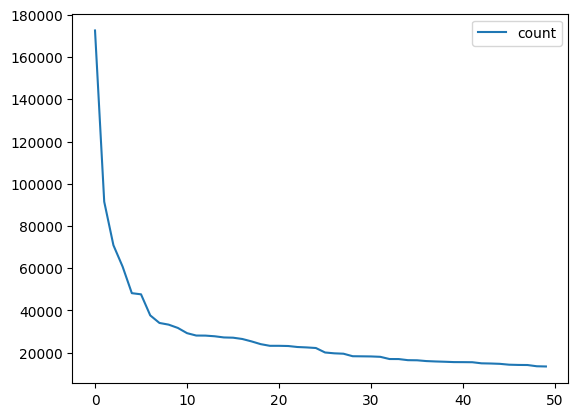

In [ ]:
df_plot.plot()

In [ ]:
# Cargar el modelo de spaCy para inglés por unica vez
#nlp = spacy.load("en_core_web_sm")

# Crear dos nuevas columnas para los adjetivos y los objetos
df2['adjectives'] = None
df2['objects'] = None

# Función para clasificar palabras en adjetivos y objetos
def categorize_words(word_list):
    adjectives = []
    objects = []
    for word in word_list:
        doc = nlp(word)
        for token in doc:
            if token.pos_ == 'ADJ':    # Identifica adjetivos
                adjectives.append(token.text)
            elif token.pos_ == 'NOUN':  # Identifica nombres (objetos)
                objects.append(token.text)
    return adjectives, objects

# Aplicar la función a cada fila del DataFrame
df2[['adjectives', 'objects']] = df2['keywords_cleaned'].apply(
    lambda x: pd.Series(categorize_words(x) if x is not None else ([], []))
)

                                                                                                                                                                                                                                                               keywords_cleaned  \
0                                                                                                                                          [nj, waitstaff, bad, experience, many, experiences, food, another, diner, restaurant, order, weekends, long, time, locations, hours]   
1  [eclectic, assortment, fresh, melon, fried, jalapeño, lots, tamale, friendly, attentive, staff, good, place, buffet, casual, relaxed, meal, mexican, choices, large, chicken, leg, menu, two, rolled, grape, leaves, expectations, breakfast, family, diner, clarion, hotel]   
2                                                                       [night, fun, lively, experience, mistakes, order, service, separate, sushi, orders, one, plate, food, r

In [ ]:
df2[['adjectives','objects']]

,adjectives,objects
0,"[bad, many]","[experiences, food, restaurant, order, weekends, time, locations, hours]"
1,"[eclectic, fresh, friendly, attentive, good, large]","[assortment, melon, lots, tamale, staff, place, casual, meal, choices, chicken, leg, menu, grape, expectations, breakfast, family, clarion, hotel]"
2,"[lively, separate, several]","[night, fun, mistakes, order, service, orders, plate, food, words, items, name, cook, money, francisco, party, waitress]"
3,"[veal, great, happy]","[heat, love, milanese, menu, location, hour, patio, fans, greens, dinner, hour]"
4,[good],"[eggplant, appetizer, food, food, service]"
...,...,...
185440,"[multiple, delicious, green]","[pico, consistency, sitio, town, order, phone, problems, things, beans, rice, food, texture, bar, beef, location, calls, water, locations, stars, customer, answer, day, condiments, bar, lemons, lime, problem, today, bin, surprise, past, times, today, service, person]"
185441,"[fast, pleasurable, best, free]","[food, restaurant, planet, wife, weekend, culvers, restaurant, chain, burger, evening, slaw]"
185442,"[large, free, small]","[time, portion, half, shepherd, bowl, bar, area, carrots, age, boyfriend, meal, leftover, city, market, meal, brick, location, parking, parking, lot]"
185443,[old],"[love, ice, cream, name, container, places, louis, chocolate, candy, people, candy, chocolate, school, dinner, candy, shop, crown, candy]"
